# NumPy Basics: Arrays and 
- Numpy Arrays : Multi-Dimesnional, fast arithmetic, linear algebra operations, vectorized functions support
- Ways of creating numpy arrays - np.arange, np.ones, np.empty, use of np.random module   
- Attributes : shape, ndim, dtype , type conversion (created a copy)
- Indexing methods : slice using [], boolean indexing, fancy indexing ;  slicing does not create a copy  
- Arithmetic and Logical Operations on arrays 
- Logical Operators used in numpy arrays - &, I, ~, ==, !=  unlike and or not in python
- Universal functions - unary and binary (vectorized)  
-  Sorting and Set functions 
- Conditional logic as numpy arrays, use of np. where()  
- Array Programming
- Statistical Operations on arrays - mean, sd, var, argmin/max  
- Boolean array operations - any, all
- numpy.random methods for Pseudo random generation   
- numpy.linalg methods for matrix operations : dot product, inv, det, eig etc  
- tanspose and swapping axes

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## Numpy enable fast numerical operations than the python objects  
### Eg. multiplication using a list of numbers vs those in ndarray

In [5]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 31.2 ms
Wall time: 1.13 s


## The NumPy ndarray: A Multidimensional Array Object

In [2]:
import numpy as np
x = 2 * np.random.randn(3,4) + 1 # normal dist. with mean 1 sd. 2
print (x)
print(x.shape)
print(x.ndim)
print (x.dtype)
# Notice the array appears as list of lists

[[ 1.33563299  5.14637434  1.49437666  2.83591957]
 [ 3.87952543 -0.18793205 -1.01800614  1.03262938]
 [ 4.23158817  3.55188536  0.27663932  0.07749065]]
(3, 4)
2
float64


In [4]:

# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [ ]:
data * 10
data + data

In [ ]:
data.shape
data.dtype

### Creating ndarrays

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
arr2.ndim
arr2.shape

(2, 4)

In [10]:
arr1.dtype
arr2.dtype

dtype('int32')

## Some methods to generate arrays

In [22]:
# Array with 0s  , dim can be supplied as a tuple
print(np.zeros(10))
print(np.ones((3, 6)))
print(np.empty((2, 3, 2)))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


In [24]:
x = np.arange(15)
print(x)
y = np.identity(4)
print(y)
print(np.ones_like(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


### Data Types for ndarrays

In [25]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [27]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
float_arr.dtype

int32


dtype('float64')

### Type conversion

In [28]:

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [30]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

## astype conversion results in a copy of the error being created

In [35]:
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
empty_uint32 = np.empty(8, dtype='u4') # empty can have garbage values
empty_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### Arithmetic with NumPy Arrays

### Array arithmetic is vectorized, and loops are not required to be used

In [36]:
# Operations b/w array of same size are element wise
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
print(arr * arr) 
arr - arr

[[  1.   4.   9.]
 [ 16.  25.  36.]]


array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [ ]:
1 / arr
arr ** 0.5

### COmparison of arrays gives boolean arrays

In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

### Basic Indexing and Slicing

## Creating slice from an array, creates a view from the array and NOT a separate array. Hence making any changes to the slice,
## broadcasts the changes back to the original array. 
## The reason for keeping this behavior was to optimize for performance and not create copies until explicitly mentioned 
## using. copy()

In [38]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [39]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [40]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [41]:
arr_slice[:] = 64 # a way to access all elements
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [51]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [52]:
arr2d[0][2]
arr2d[0, 2]

3

### 3 d array and slicing

In [53]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
old_values = arr3d[0].copy()
arr3d[0] = 42 # assigning a scalar to an array broadcasts the value to all elements
print(arr3d)
arr3d[0] = old_values # scalar and arrays can be assigned
arr3d

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [57]:
arr3d[1, 0:2]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [58]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

#### Indexing with slices -  same ideas work as slicing on lists

In [60]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [61]:
arr2d
arr2d[:2] # selection of 2 rows

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
arr2d[:2, 1:] # selection of 2 rows, last two columns

array([[2, 3],
       [5, 6]])

In [63]:
arr2d[1, :2] # second row, columns 0 and 1

array([4, 5])

In [64]:
arr2d[:2, 2]

array([3, 6])

In [65]:
arr2d[:, :1] # columns 0

array([[1],
       [4],
       [7]])

In [66]:
arr2d[:2, 1:] = 0 # value assignment can be made by slicing and broadcasting
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [3]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']) # row names
data = np.random.randn(7, 4)
names
data

array([[  2.94036172e-02,  -1.35238778e+00,   2.08091771e+00,
          1.95734845e-01],
       [ -2.91703180e-01,  -1.52070744e+00,  -3.63990210e+00,
          7.46532656e-02],
       [ -2.80473695e-01,   4.46057927e-01,   6.81131785e-01,
          5.06539179e-05],
       [  2.61478910e-02,   1.84517669e+00,  -1.42502484e-01,
          1.10515704e+00],
       [ -5.25325691e-01,   4.79414676e-01,   3.29734460e-01,
         -2.66023469e-03],
       [ -1.27735775e+00,   5.79513662e-01,  -1.45162437e-01,
          1.37861020e+00],
       [ -5.82668264e-01,   1.18602549e+00,   1.05879265e+00,
         -1.43811866e+00]])

In [4]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [6]:
data[names == 'Bob']  # slicing rows using boolean array

array([[ 0.02940362, -1.35238778,  2.08091771,  0.19573484],
       [ 0.02614789,  1.84517669, -0.14250248,  1.10515704]])

In [7]:
data[names == 'Bob', 2:] # mix of boolean and slices for indexing
data[names == 'Bob', 3]

array([ 0.19573484,  1.10515704])

### Numpy array work with logical operators == , &, |,  !, ~ ;  and not with python equivalent and , or, not  
### Boolean indexing creates a copy of the array, unlike slicing

In [8]:
names != 'Bob'
data[~(names == 'Bob')]

array([[ -2.91703180e-01,  -1.52070744e+00,  -3.63990210e+00,
          7.46532656e-02],
       [ -2.80473695e-01,   4.46057927e-01,   6.81131785e-01,
          5.06539179e-05],
       [ -5.25325691e-01,   4.79414676e-01,   3.29734460e-01,
         -2.66023469e-03],
       [ -1.27735775e+00,   5.79513662e-01,  -1.45162437e-01,
          1.37861020e+00],
       [ -5.82668264e-01,   1.18602549e+00,   1.05879265e+00,
         -1.43811866e+00]])

In [12]:
cond = names == 'Bob'
data[~cond]

array([[ -2.91703180e-01,  -1.52070744e+00,  -3.63990210e+00,
          7.46532656e-02],
       [ -2.80473695e-01,   4.46057927e-01,   6.81131785e-01,
          5.06539179e-05],
       [ -5.25325691e-01,   4.79414676e-01,   3.29734460e-01,
         -2.66023469e-03],
       [ -1.27735775e+00,   5.79513662e-01,  -1.45162437e-01,
          1.37861020e+00],
       [ -5.82668264e-01,   1.18602549e+00,   1.05879265e+00,
         -1.43811866e+00]])

In [13]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[  2.94036172e-02,  -1.35238778e+00,   2.08091771e+00,
          1.95734845e-01],
       [ -2.80473695e-01,   4.46057927e-01,   6.81131785e-01,
          5.06539179e-05],
       [  2.61478910e-02,   1.84517669e+00,  -1.42502484e-01,
          1.10515704e+00],
       [ -5.25325691e-01,   4.79414676e-01,   3.29734460e-01,
         -2.66023469e-03]])

### Filtering of array can be done easily, since boolean indexing is used, a copy of array is created

In [16]:
x = data[data < 0] = 0
print(x)
data


0


array([[  2.94036172e-02,   0.00000000e+00,   2.08091771e+00,
          1.95734845e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.46532656e-02],
       [  0.00000000e+00,   4.46057927e-01,   6.81131785e-01,
          5.06539179e-05],
       [  2.61478910e-02,   1.84517669e+00,   0.00000000e+00,
          1.10515704e+00],
       [  0.00000000e+00,   4.79414676e-01,   3.29734460e-01,
          0.00000000e+00],
       [  0.00000000e+00,   5.79513662e-01,   0.00000000e+00,
          1.37861020e+00],
       [  0.00000000e+00,   1.18602549e+00,   1.05879265e+00,
          0.00000000e+00]])

In [22]:
data[names != 'Joe'] = 6
data

array([[ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 0.        ,  0.        ,  0.        ,  0.07465327],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 0.        ,  0.57951366,  0.        ,  1.3786102 ],
       [ 0.        ,  1.18602549,  1.05879265,  0.        ]])

### Boolean indexing creates a copy of the array, unlike slicing

In [27]:
temp = data[names == 'Joe'] # subset selected
print(temp)
temp[0] = 3  # make change to the subset
print (temp) 
data  # no change to the original array, whereas by using slicing, the original array also changes

[[ 0.          0.          0.          0.07465327]
 [ 0.          0.57951366  0.          1.3786102 ]
 [ 0.          1.18602549  1.05879265  0.        ]]
[[ 3.          3.          3.          3.        ]
 [ 0.          0.57951366  0.          1.3786102 ]
 [ 0.          1.18602549  1.05879265  0.        ]]


array([[ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 0.        ,  0.        ,  0.        ,  0.07465327],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 6.        ,  6.        ,  6.        ,  6.        ],
       [ 0.        ,  0.57951366,  0.        ,  1.3786102 ],
       [ 0.        ,  1.18602549,  1.05879265,  0.        ]])

### Fancy Indexing - using integer array to select rows and columns or elements  
### Also returns a copy of the array

In [28]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [30]:
arr[[4, 3, 0, 6]] # selection of rows in order of passing indices of rows in a list

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [31]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [32]:
arr = np.arange(32).reshape((8, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [33]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] # selection of elements by passing a list of lists with row and col indices

array([ 4, 23, 29, 10])

In [34]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # selection of any rectangular region by passing list of lists 

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes

### What are axes of a numpy array

In [37]:
x = np.arange(24).reshape(2,3,4)
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [38]:
print(x.sum(axis= 0)) # corresponding elements are added from two subarrays
print(x.sum(axis= 1))  # columns are added for each array, two rows for each array formed
print(x.sum(axis= 2))  # rows are added for each subarray, a row for each array formed


[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]
[[12 15 18 21]
 [48 51 54 57]]
[[ 6 22 38]
 [54 70 86]]


### Transpose and swapaxes only create a view not a copy

In [42]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T # lets you get th transpose in a view
#print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [43]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr) # matrix multiplication

array([[ 4.14033049,  0.67072128, -0.57390613],
       [ 0.67072128,  1.98954016, -0.33703741],
       [-0.57390613, -0.33703741,  2.50363258]])

In [45]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2)) # transpose metjhod takes a tuple with any re-ordering of the axes that needs to be specified
# Here axes 0 is swapped with 1 resulting in changes below that can be confirmed

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [47]:
arr
arr.swapaxes(1, 2) # results in transpose in sub parts of the array

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions
ufuncs are functions that normally operate on scalar quantities, but are wrappers written to operate on arrays as well, they are  called vectorixed functions. Key arithmetic functions are -  
- unary : abs, fabs(Ignores nan) sqrt,square, exp, log, log10, isnan, isinfinite, ceil, floor, modf
- binary : operate on two argument. add, subtract, multiply, divide, maximum, minimum, fmax, fmin, mod ( element wise modulus),
  greater, less, equal, logical_and, logical_or

In [48]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [49]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

array([-0.42982454,  1.8789988 ,  0.81276437,  0.32894748,  1.22545942,
        0.82515475, -0.4516303 ,  0.62638134])

In [53]:
# modf is an oddity, it return two arrays one for whole part, other for fractional part
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 0.54796562  0.05076291 -0.88215902 -0.58972694 -0.16065702  0.34517595
 -0.78407307]
[ 1.  0. -3. -9. -2.  3. -5.]


In [54]:
arr
print(np.sqrt(arr))
print(np.sqrt(arr, arr))   # utilizes an out arguent to do in place operation
arr

[ 1.24417267  0.22530627         nan         nan         nan  1.82898222
         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([ 1.54796562,  0.05076291, -3.88215902, -9.58972694, -2.16065702,
        3.34517595, -5.78407307])

## Array-Oriented Programming with Arrays

In [ ]:
## Meshgrid - what is it
### Function that lets you start from a one dimension array and create a mesh like structure
### say start from [1,2,3,4] and create all possible pairs, which will be 10 
### Ways to represent these is using these two matrices, where pair of corresponding elements represent each pair,
### order mattering

1 1 1 1     1 2 3 4
2 2 2 2     1 2 3 4
3 3 3 3     1 2 3 4   
4 4 4 4     1 2 3 4

In [61]:
a1 = np.arange(1,4,1)
y1, y2 = np.meshgrid(a1, a1)
print(y1)
print(y2)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


### Numpy arrays allow for vectorized operations, that are much faster than using python objects

In [62]:
# Example - evaluate values of function sqrt (x **2 + y **2) over a grid of values
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [63]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

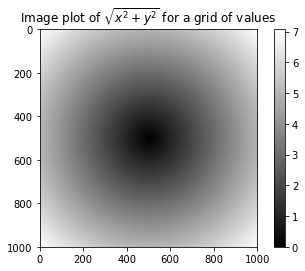

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [69]:
plt.draw()

In [70]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

In [71]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [76]:
# List comprehension way of doing a conditional operation
%time result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

Wall time: 0 ns


[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [78]:
# Use numpy.where -  which is vectorized and much fast for big arrays; and will work for multi Dimensional arrays
%time result = np.where(cond, xarr, yarr)
result

Wall time: 0 ns


array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [79]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[-2,  2, -2,  2],
       [-2, -2,  2,  2],
       [-2, -2, -2, -2],
       [-2, -2, -2,  2]])

In [80]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.39039362,  2.        , -2.22404731,  2.        ],
       [-0.29473819, -1.98766758,  2.        ,  2.        ],
       [-0.99184004, -1.11100492, -0.3566664 , -0.70180239],
       [-0.52736757, -0.98903198, -0.63763026,  2.        ]])

### Mathematical and Statistical Methods

In [81]:
arr = np.random.randn(5, 4)
arr
print(arr.mean())
print(np.mean(arr))
arr.sum()

0.246793241558
0.246793241558


4.9358648311676809

### Statsitical Functions can be applied on a dimension - column, rows
- Functions : sum, mean, std, var,min, max,argmin, argmax(indices of min/max), cumsum, cumprod

In [83]:
print(arr.mean(axis=1))
arr.sum(axis=0)

[ 0.42099649 -0.10387127  0.00937078  0.85092293  0.05654728]


array([ 3.81444485,  3.25205416, -0.10920094, -2.02143323])

In [84]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [85]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print(arr.cumsum(axis=0))
arr.cumprod(axis=1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays 
- any, all, sum  
- Boolean array is coerced to 1,0 when methods are applied that operate on numeric qts.

In [86]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

50

In [88]:
bools = np.array([False, False, True, False])
print(bools.any())
bools.all()

True


False

### Sorting

In [ ]:
arr = np.random.randn(6)
arr
arr.sort()
arr

In [ ]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and Other Set Logic

In [89]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names)) # gives uniques and sorted
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])

In [90]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [91]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6]) # test of membership

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## File Input and Output with Arrays

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra  
- Unlinke many languages * in mumpy represents element wise multiplication in arrays
- Matrix multiplication in indicated using np.dot() method / @ operator  
- np.linag module has lin algebra methods like - inv,det, eig, diag ( of a square matrix), trace (sum of diag. elements), 
  svd (Singular Value Decomp.), lstsq (Least Square solution to Ax = B) , solve (Ax =b), qr (QR decomposition)


In [92]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [93]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [94]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [95]:
x @ np.ones(3)

array([  6.,  15.])

In [96]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-3.3129839 , -1.41919841,  3.28105938, -0.10055968, -8.18498486],
       [ 0.        , -5.17701341, -1.89111359, -1.25941533, -8.3342458 ],
       [ 0.        ,  0.        , -1.18814546, -0.12099899, -0.47303476],
       [ 0.        ,  0.        ,  0.        , -1.89857523, -1.86037732],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.78165646]])

## Pseudorandom Number Generation  
- Called pseudorandom because random number algorithm is tied to a seed number
- better performance in generating samples from prob. distributions than the facility available from 'random'  
- some methods available  are: 
seed  
rand - generate random nos. from uniform distribution  
randint - draw random ints. from a range  
randn - from standard normal dist   
binomial   
normal  
gamma   
uniform  
chisquare  
beta

In [104]:
samples = np.random.normal(size = (4, 4))
samples

array([[-1.16626539, -0.22422734, -0.37172626,  0.09584255],
       [ 1.33594779, -0.15592632,  0.9476795 ,  1.43864713],
       [ 0.96076094,  1.76183507, -0.60925508,  1.33385689],
       [ 0.15499571,  0.85949269,  0.02986713,  0.2186652 ]])

In [97]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 1.22 s per loop
10 loops, best of 3: 46.2 ms per loop


In [ ]:
np.random.seed(1234) # seed setting

In [105]:
rng = np.random.RandomState(1234) # to generate random seet separate from a global seed setting
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks

In [113]:
np.random.randint(0,1)

0

In [114]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1    # python random library usage
    position += step
    walk.append(position)

In [115]:
plt.figure()

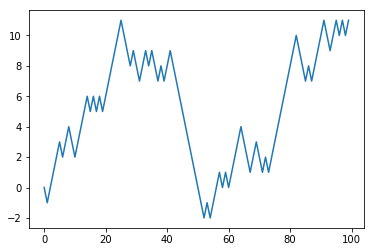

In [116]:
plt.plot(walk[:100])

In [118]:
np.random.seed(12345)

In [119]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [120]:
walk.min()
walk.max()

31

In [121]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

In [122]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ..., 
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [124]:
print(walks.max())
walks.min()

138


-133

In [125]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [126]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.88973607038122

In [128]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps)) # using normal distribution

## Conclusion